In [1]:
import os
import gc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm.notebook import tqdm

pd.options.display.max_rows = None
pd.options.display.max_columns = None

%matplotlib inline

In [2]:
%%time
with open('../input/train_data.pkl', 'rb') as f:
    df = pickle.load(f)
    
df['S_2'] = pd.to_datetime(df['S_2'].astype('str'))

CPU times: user 1.32 s, sys: 3 s, total: 4.32 s
Wall time: 6.27 s


In [4]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

In [5]:
df.shape

(5531451, 190)

## customer_ID

In [6]:
# Check duplicated ID with test data
test = pd.read_csv('../input/test_data.csv', chunksize=800000, usecols=['customer_ID', 'S_2'])
for t in test:
    test = t
    break

# No duplicated ID
display(df[df['customer_ID'].isin(test['customer_ID'].unique())])

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145


In [7]:
print('Train Date Range')
print(df['S_2'].min())
print(df['S_2'].max())

print('Test Date Range')
print(test['S_2'].min())
print(test['S_2'].max())

Train Date Range
2017-03-01 00:00:00
2018-03-31 00:00:00
Test Date Range
2018-04-01
2019-10-31


In [8]:
ids = df['customer_ID'].unique().tolist()[12353]

df[df['customer_ID'] == ids]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
148948,06f67577ec944835e2675d496b346d6bf759400460af6e...,2017-03-26,0.843232,0.004082,0.177311,0.815840,0.001874,0.143775,0.008524,0.004296,NaN,0.079227,0.008219,0.168659,0.189880,0.086386,0.006965,0.261095,0.515178,0.436103,0.338727,0.003515,0.659567,0.005641,0.073715,0.008443,0.234043,0.205206,0.201725,0.792582,0.012532,NaN,0.081767,0.130585,1.004182,1.002711,0.008762,0.094488,0.015515,0.755667,0.531261,NaN,0.052234,0.007413,0.318909,0.001447,0.043030,0.250391,0.070828,0.417375,0.000409,0.444357,0.011305,CO,R,0.003429,0.508439,0.001806,0.531899,0.421101,NaN,0.007524,6.0,0.189466,0.006565,0.679772,0.007630,0.004753,0.008767,0.001257,0.006741,0.008095,0.205752,0.628077,NaN,0.009485,0.224114,0.209047,NaN,0.002242,0.009331,NaN,0.071014,0.005661,0.005301,0.506963,0.006472,NaN,0.003637,0.007084,0.003820,0.004915,0.005136,0.005570,NaN,0.005406,1.007391,0.238718,0.004312,0.001914,0.008875,0.009685,0.005411,0.507840,NaN,0.0,0.004268,0.002463,NaN,0.004129,0.005965,NaN,1,0.005465,0.004390,0.005112,0.006576,0.004163,0.002615,1.001026,0.009135,0.002292,0.009724,0.003895,0.005842,0.008069,0.009891,0.009640,0.004126,0.005520,0.946073,0.139731,0.956638,0.978549,0.169484,0.697564,1.007330,0.973060,0.408176,0.007155,0.335438,0.009060,0.171457,NaN,1.006580,3.0,NaN,0.006612,NaN,NaN,NaN,1.006263,0.424569,0.354975,0.007753,0.0,0.319518,0.0,3.0,0.310929,0.314368,0.0,0.655671,0.577316,0.006310,0.318223,0.006425,1.0,0.005320,1.006526,1.008155,0.006276,NaN,1.002038,1.004370,0.375660,0.473678,0.003364,NaN,NaN,NaN,NaN,NaN,0.000213,0.006197,0.002444,NaN,0.007410,0.006548,0.009873
148949,06f67577ec944835e2675d496b346d6bf759400460af6e...,2017-04-08,0.808032,0.332968,0.068630,1.004346,0.007714,0.138520,0.006534,0.036162,NaN,0.065719,0.003594,0.172627,0.188950,0.084794,0.000573,0.289313,0.518253,0.423169,0.344324,0.008475,0.418156,0.007096,0.066479,0.007288,0.274287,0.106746,0.206344,0.695564,0.033502,NaN,0.079438,0.057164,1.005099,1.004858,0.002290,0.098425,0.027848,0.709623,0.520561,NaN,0.078265,0.009965,0.325492,0.005657,0.043009,0.258956,0.081668,0.424486,0.006265,0.328012,0.014949,CO,R,0.005024,0.673198,NaN,0.534071,0.575188,NaN,0.064400,6.0,0.185874,0.009284,0.429743,0.002250,0.003904,0.002653,0.000617,0.010727,0.004297,0.205700,0.399490,NaN,0.000462,0.222032,0.267065,NaN,0.003634,0.003436,NaN,0.081311,0.009475,0.005627,0.505021,0.009321,NaN,0.008002,0.003684,0.001984,0.002196,0.003588,0.005031,NaN,0.007250,1.002573,0.238348,0.009621,0.001869,0.004721,0.008868,0.001774,0.008886,NaN,0.0,0.000126,0.000003,NaN,0.006110,0.008693,NaN,1,0.007389,0.000386,0.000239,0.005898,0.004714,0.006943,0.003561,0.002772,0.008237,0.003537,0.004944,0.003615,0.007307,0.004450,0.003538,0.004707,0.009606,0.950317,0.131125,0.955056,0.969726,0.162165,0.698047,1.000319,0.978038,0.414491,0.182703,0.334910,0.008035,0.074079,NaN,1.001822,5.0,NaN,0.001447,NaN,NaN,NaN,1.007252,0.431469,0.353831,0.001480,0.0,0.319643,0.0,3.0,0.318342,0.322075,0.0,0.663024,0.572917,0.008980,0.328113,0.003570,1.0,0.009871,1.002161,1.000593,0.00270

In [9]:
# year-monthごとのレコード数
df['S_2_'] = pd.to_datetime(df['S_2'].values)

df['year'] = df['S_2_'].dt.year
df['month'] = df['S_2_'].dt.month

df['year_month'] = df['year'].astype(str) + df['month'].astype(str)

group = df.groupby('year_month')['customer_ID'].count()

group

year_month
201710    430292
201711    434268
201712    438910
20173     395630
20174     401556
20175     400306
20176     410384
20177     415602
20178     421099
20179     425455
20181     446255
20182     452781
20183     458913
Name: customer_ID, dtype: int64

In [10]:
# unique customer_ID: 458913 < train data records: 5531451
# Train data have duplicated customer_ID
df['customer_ID'].nunique()

458913

In [11]:
# Test data are same
test['customer_ID'].nunique()

65101

In [12]:
# Extract one customer_ID
# It looks like transaction record
# S_2 looks like transaction date
_id = df['customer_ID'].unique()[0]
df[df['customer_ID'] == _id]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,S_2_,year,month,year_month
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03-09,2017,3,20173
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.00

In [13]:
del test, df
gc.collect()

25

## Data Stats

- D_* = Delinquency variables
- S_* = Spend variables
- P_* = Payment variables
- B_* = Balance variables
- R_* = Risk variables

### D_*

Delinquency variablesDelinquency variables

- categorical features
```
'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'
```

### Load Dataset

In [14]:
with open('../input/train_data_D.pkl', 'rb') as f:
    df = pickle.load(f)
    
features = [f for f in df.columns if f.startswith('D')]
cnt_features = [f for f in df.select_dtypes(exclude=['object']) if f.startswith('D')]

In [15]:
df.head()

,customer_ID,S_2,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.001733,0.008771,NaN,NaN,0.000630,0.708906,0.358587,0.525351,0.255736,NaN,0.148698,1.335856,0.207334,NaN,1.001519,0.354596,0.152025,0.158612,0.063646,0.199617,0.308233,0.091071,CR,O,0.007126,NaN,6.0,0.009013,0.008342,0.119403,0.004802,NaN,0.080422,0.069067,NaN,NaN,0.001576,0.004239,0.004061,0.003532,0.506612,0.007043,0.000830,0.007084,NaN,NaN,0.002665,1.503673,1.006133,0.003569,0.008871,0.004950,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,NaN,0.004326,NaN,NaN,1.007336,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.002052,0.005972,NaN,0.004345,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.005775,0.000798,NaN,NaN,0.002526,0.712795,0.353630,0.521311,0.223329,NaN,0.149723,1.339794,0.202778,NaN,1.009033,0.326757,0.156201,0.148459,0.065501,0.151387,0.265026,0.086805,CR,O,0.002413,NaN,6.0,0.007842,0.006524,0.140611,0.000094,NaN,0.081413,0.074166,NaN,NaN,0.009896,0.007597,0.000127,0.007773,0.500855,0.007789,0.009469,0.006677,NaN,NaN,0.002508,1.503577,1.005791,0.000571,0.000391,0.003180,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,NaN,0.008707,NaN,NaN,1.007653,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.001034,0.004838,NaN,0.007495,NaN,NaN,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.091505,0.007598,NaN,NaN,0.007605,0.720884,0.334650,0.524568,0.189424,NaN,0.151955,1.337179,0.206629,NaN,1.009184,0.304124,0.153795,0.139504,0.070607,0.305883,0.212165,0.094001,CR,O,0.001878,NaN,6.0,0.006025,0.002615,0.075868,0.007152,NaN,0.078891,0.076510,NaN,NaN,0.009629,0.003094,0.000954,0.008811,0.504606,0.004093,0.002325,0.001185,NaN,NaN,0.009634,1.503359,1.005801,0.007425,0.009234,0.005433,0.806840,1.003014,1.009285,0.928719,NaN,0.670901,NaN,0.004092,NaN,NaN,1.004312,0.003269,1.0,0.239867,0.0,4.0,0.240768,0.239710,0.0,0.704843,0.434409,0.003954,0.690101,0.009617,1.0,1.009307,1.007831,1.006878,0.005681,0.005497,NaN,0.009227,NaN,NaN,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.002455,0.000685,NaN,NaN,0.006406,0.723997,0.323271,0.530929,0.135586,NaN,0.151219,1.339909,0.208214,NaN,1.007455,0.275055,0.155772,0.138100,0.065926,0.273553,0.204300,0.094854,CR,O,0.005899,NaN,6.0,0.005271,0.002052,0.150209,0.005364,NaN,0.077490,0.071547,NaN,NaN,0.008568,0.003895,0.005665,0.004652,0.508998,0.008817,0.005924,0.003324,NaN,NaN,0.007791,1.503701,1.007036,0.000664,0.003200,0.000063,0.808214,1.001517,1.004514,0.935383,NaN,0.672620,NaN,0.009703,NaN,NaN,1.002538,0.000053,1.0,0.240910,0.0,4.0,0.239400,0.240727,0.0,0.711546,0.436903,0.005135,0.687779,0.004649,1.0,1.001671,1.003460,1.007573,0.007108,0.008261,NaN,0.007206,NaN,NaN,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.002483,0.004653,NaN,NaN,0.007731,0.720619,0.231009,0.529305,NaN,NaN,0.154026,1.341735,0.205468,NaN,1.003738,0.231110,0.154914,0.126443,0.063697,0.233103,0.175655,0.093915,CR,O,0.009479,NaN,6.0,0.000152,0.001419,0.096441,0.007972,NaN,0.076561,0.074432,NaN,NaN,0.003289,0.002608,0

### Null Rate

In [16]:
# Nulls(%)
null_rate = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['null']).sort_values(by='null', ascending=False).T

In [17]:
null_rate

,D_87,D_88,D_108,D_110,D_111,D_73,D_134,D_138,D_137,D_135,D_136,D_106,D_132,D_49,D_76,D_66,D_42,D_142,D_53,D_82,D_50,D_105,D_56,D_77,D_43,D_46,D_62,D_48,D_61,D_78,D_44,D_64,D_68,D_83,D_69,D_55,D_120,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_125,D_121,D_122,D_123,D_124,D_91,D_126,D_59,D_131,D_130,D_129,D_128,D_139,D_141,D_143,D_145,D_107,D_104,D_103,D_70,D_79,D_133,D_144,D_102,D_140,D_84,D_89,D_52,D_81,D_72,D_80,D_74,D_112,D_45,D_54,D_41,D_109,D_39,D_60,D_47,D_58,D_51,D_127,D_63,D_65,D_71,D_75,D_86,S_2,D_92,D_93,D_94,D_96,customer_ID
null,99.930127,99.891457,99.476846,99.43353,99.43353,98.990211,96.480146,96.480146,96.480146,96.480146,96.480146,90.213255,90.191055,90.137597,88.746226,88.730733,85.694278,82.926577,73.842921,73.373406,56.809723,54.622756,54.071581,45.447605,29.981211,21.905627,13.706367,12.993426,10.811847,4.959259,4.959259,3.931012,3.914036,3.515768,3.515768,3.34095,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,2.84222,2.111851,1.929421,1.835829,1.835829,1.835829,1.835829,1.835829,1.835829,1.835829,1.835829,1.835829,1.835829,1.835829,1.715951,1.372859,0.772239,0.736281,0.734979,0.734563,0.534453,0.534453,0.534453,0.464381,0.428604,0.393622,0.393622,0.047908,0.036464,0.036446,0.036446,0.028871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It looks same null rate(3.194749%)
```
D_115, D_120, D_113, D_123, D_118, D_116, D_124, D_125, D_114, D_117, D_119
```

It looks same null rate(1.835829%)
```
D_128, D_129, D_130, D_139, D_141, D_143, D_131, D_145, D_104, D_107, D_103
```


It seems that these features are related each other.

In [18]:
# Nulls(%)
null_rate = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['null']).T

In [19]:
null_rate

,customer_ID,S_2,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
null,0.0,0.0,0.0,0.036446,85.694278,29.981211,4.959259,0.036464,21.905627,0.0,12.993426,90.137597,56.809723,0.0,0.534453,73.842921,0.036446,3.34095,54.071581,0.0,1.929421,0.0,10.811847,13.706367,0.0,3.931012,0.0,88.730733,3.914036,3.515768,1.715951,0.0,0.428604,98.990211,0.393622,0.0,88.746226,45.447605,4.959259,1.372859,0.393622,0.464381,73.373406,3.515768,0.534453,0.0,99.930127,99.891457,0.534453,2.84222,0.0,0.0,0.0,0.0,0.734979,1.835829,1.835829,54.622756,90.213255,1.835829,99.476846,0.028871,99.43353,99.43353,0.047908,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,3.194749,2.111851,0.0,1.835829,1.835829,1.835829,1.835829,90.191055,0.772239,96.480146,96.480146,96.480146,96.480146,96.480146,1.835829,0.734563,1.835829,82.926577,1.835829,0.736281,1.835829


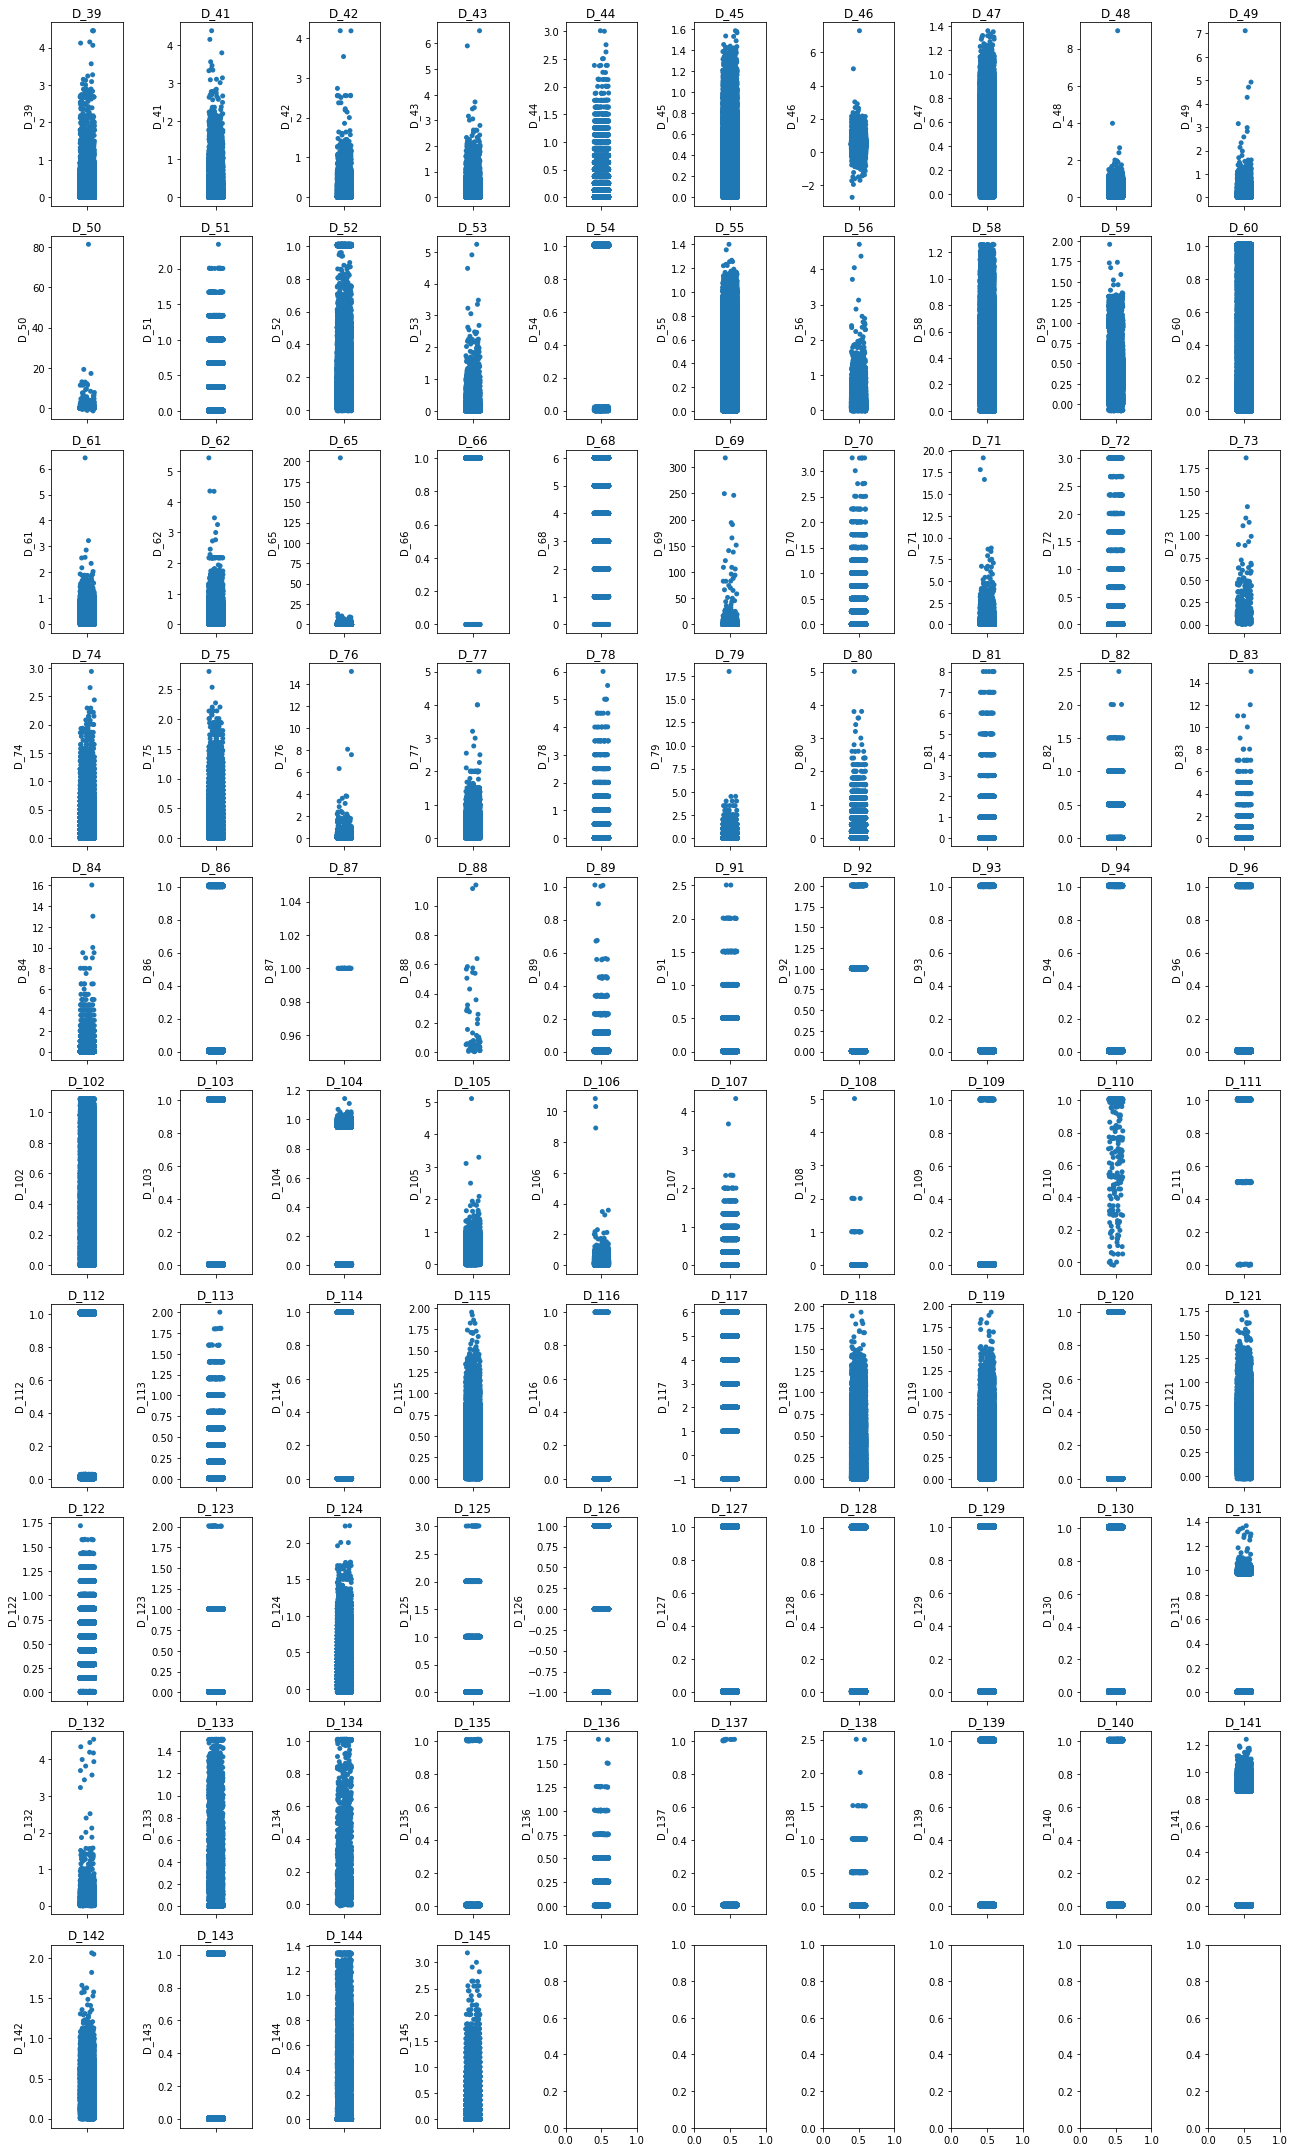

In [20]:
ncols = 10
feats = cnt_features

nrows = int(np.ceil(len(feats) / ncols))
df_sampled = df.sample(frac=0.01, random_state=0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18, int(3 * nrows)))

for ax, f in zip(axes.ravel(), feats):
    # sns.histplot(df_sampled[f], ax=ax)
    sns.stripplot(y=f, data=df_sampled, ax=ax)
    ax.set_title(f)
    
plt.tight_layout()
plt.show()

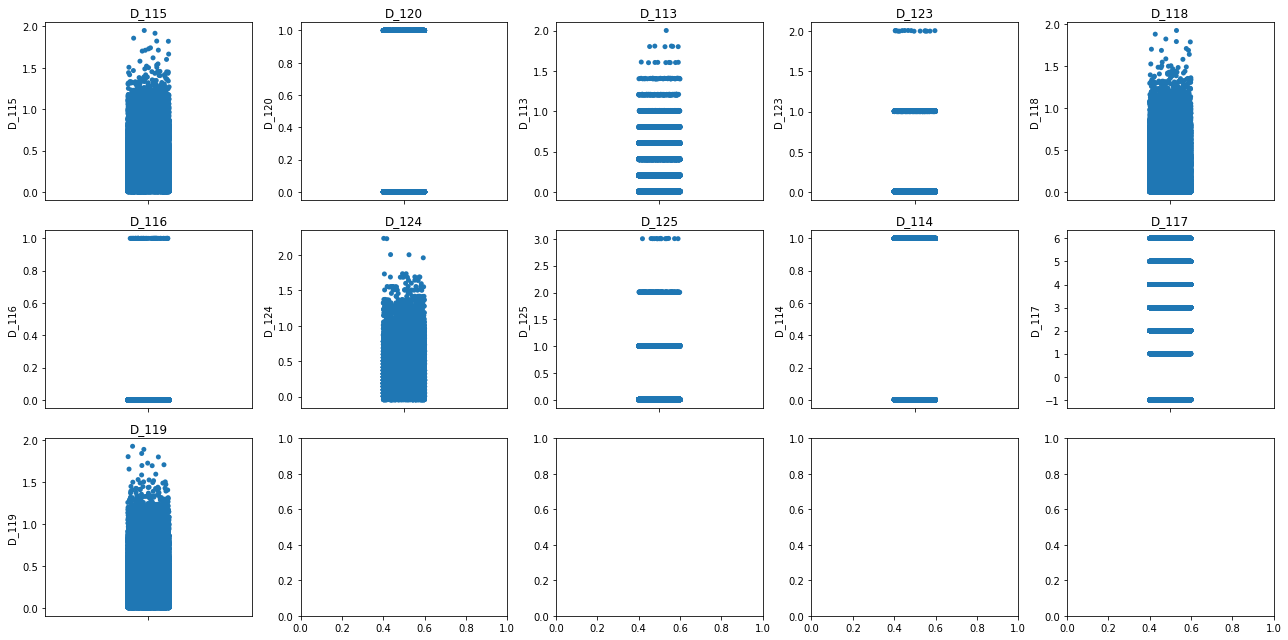

In [21]:
ncols = 5
feats = ['D_115', 'D_120', 'D_113', 'D_123', 'D_118', 'D_116', 'D_124', 'D_125', 'D_114', 'D_117', 'D_119']

nrows = int(np.ceil(len(feats) / ncols))
df_sampled = df.sample(frac=0.01, random_state=0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18, int(3 * nrows)))

for ax, f in zip(axes.ravel(), feats):
    # sns.histplot(df_sampled[f], ax=ax)
    sns.stripplot(y=f, data=df_sampled, ax=ax)
    ax.set_title(f)
    
plt.tight_layout()
plt.show()

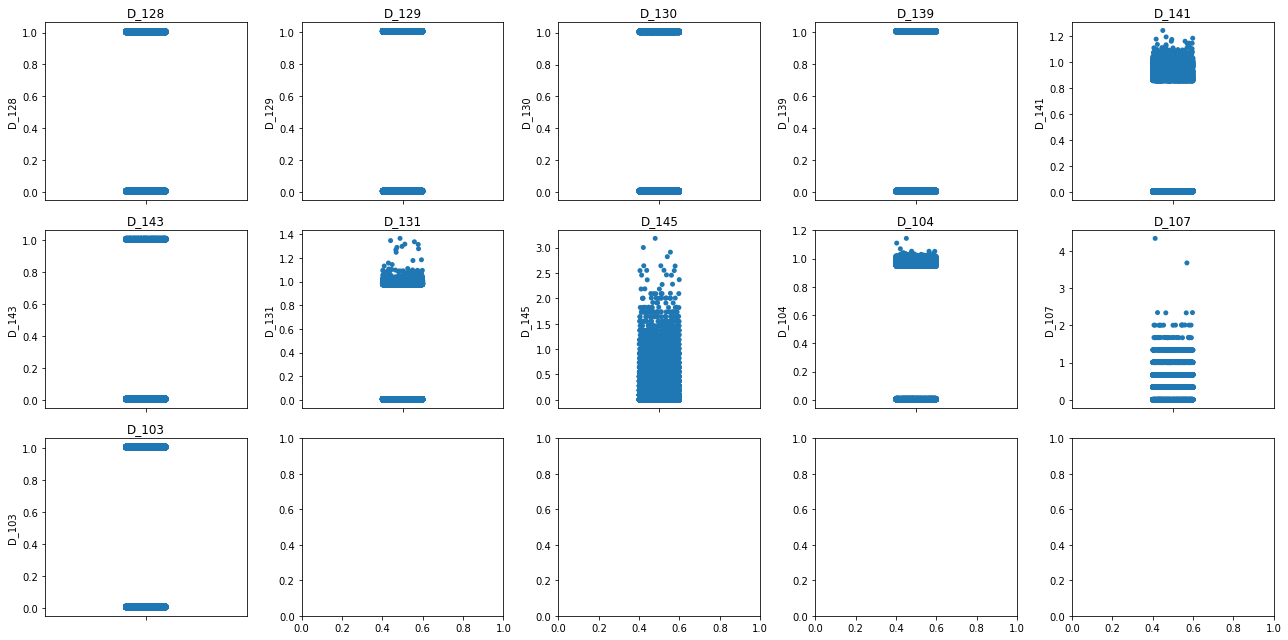

In [22]:
ncols = 5
feats = ['D_128', 'D_129', 'D_130', 'D_139', 'D_141', 'D_143', 'D_131', 'D_145', 'D_104', 'D_107', 'D_103']

nrows = int(np.ceil(len(feats) / ncols))
df_sampled = df.sample(frac=0.01, random_state=0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18, int(3 * nrows)))

for ax, f in zip(axes.ravel(), feats):
    # sns.histplot(df_sampled[f], ax=ax)
    sns.stripplot(y=f, data=df_sampled, ax=ax)
    ax.set_title(f)
    
plt.tight_layout()
plt.show()

In [23]:
target_customer_id = df['customer_ID'].unique()[62]

tmp = df[df['customer_ID'] == target_customer_id].sort_values(by='S_2')

In [24]:
# 離散数値
tmp[['S_2', 'D_127', 'D_68', 'D_137', 'D_72', 'D_78', 'D_81', 'D_82']]

,S_2,D_127,D_68,D_137,D_72,D_78,D_81,D_82
749,2017-03-07,0.000024,5.0,NaN,0.008542,0.000970,0.006626,NaN
750,2017-04-11,0.000298,5.0,NaN,0.008344,0.005061,0.004547,NaN
751,2017-05-19,0.001982,6.0,NaN,0.009699,0.007757,0.001415,NaN
752,2017-06-09,0.000403,6.0,NaN,0.001264,0.001834,0.002926,NaN
753,2017-07-08,0.000829,5.0,NaN,0.005116,0.006530,0.006697,NaN
754,2017-08-31,0.003827,5.0,NaN,0.002770,0.002502,0.004351,NaN
755,2017-09-18,0.004758,5.0,NaN,0.008870,0.005401,0.001470,NaN
756,2017-10-16,0.005552,5.0,NaN,0.000831,0.005386,0.002781,NaN
757,2017-11-14,0.008471,5.0,NaN,0.005308,0.006187,0.006118,NaN
758,2017-12-19,0.002400,5.0,NaN,0.007767,0.005974,0.003861,NaN


### S_*

Spend variables

- categorical features
```
None
```

In [25]:
with open('../input/train_data_S.pkl', 'rb') as f:
    df = pickle.load(f)
    
features = [f for f in df.columns if f.startswith('S')]

In [26]:
df.head()

,customer_ID,S_2,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.124035,0.023381,0.008322,0.161345,0.922998,0.065728,0.401619,0.272008,0.515222,0.108271,0.002271,0.008033,0.005720,0.002537,0.009705,0.894090,0.135561,0.911191,0.974539,0.001243,0.676922
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.126750,0.030599,0.002482,0.140951,0.919414,0.093935,0.406326,0.188970,0.509048,0.101018,0.009810,0.000760,0.007584,0.008427,0.009924,0.902135,0.136333,0.919876,0.975625,0.004561,0.822281
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.123977,0.048367,0.000530,0.112229,1.001977,0.084757,0.406768,0.495308,0.679257,0.103239,0.009362,0.004056,0.005901,0.007327,0.008446,0.939654,0.134938,0.958699,0.974067,0.011736,0.853498
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.117169,0.030063,0.000783,0.102838,0.704016,0.048382,0.405175,0.508670,0.515282,0.206394,0.004876,0.006969,0.002520,0.007053,0.006614,0.913205,0.140058,0.926341,0.975499,0.007571,0.844667
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.117325,0.054221,0.006698,0.094311,0.917133,0.039259,0.487460,0.216507,0.507712,0.106020,0.007447,0.001770,0.000155,0.007728,0.005511,0.921026,0.131620,0.933479,0.978027,0.018200,0.811199


### Null Rate

In [27]:
# Nulls(%)
null_rate = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['null']).T

In [28]:
null_rate

,customer_ID,S_2,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27
null,0.0,0.0,18.449843,0.0,0.0,18.449843,0.0,53.035686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343924,0.008045,0.336132,0.232254,0.011462,25.326718


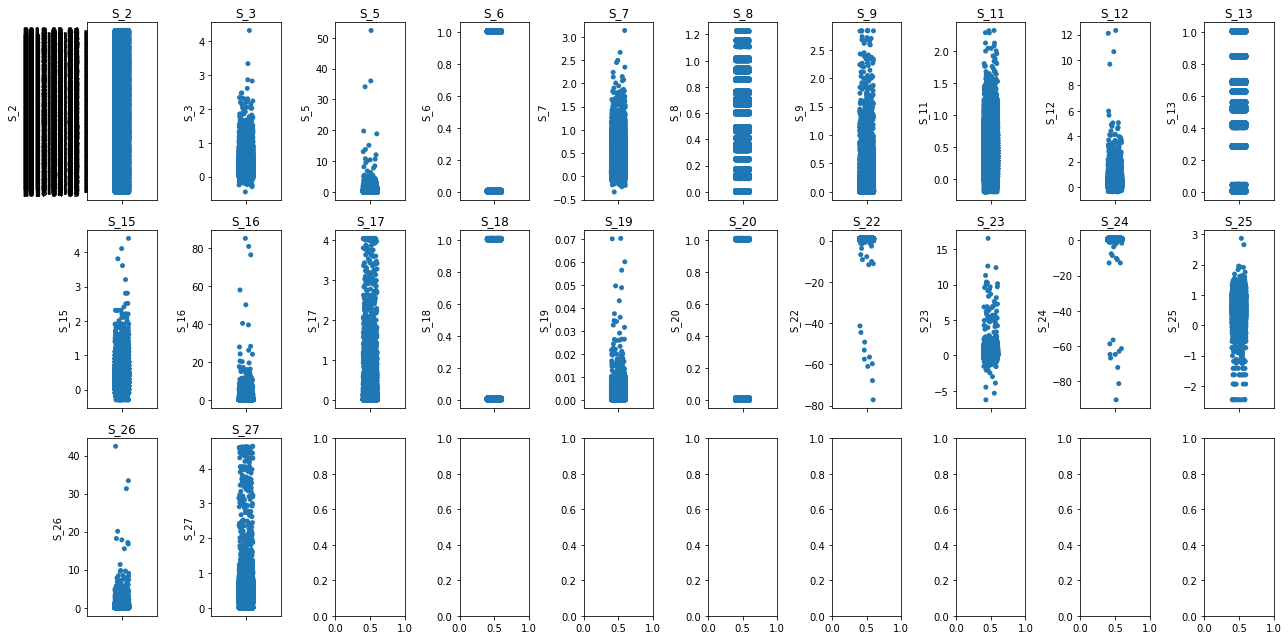

In [29]:
ncols = 10
feats = features

nrows = int(np.ceil(len(feats) / ncols))
df_sampled = df.sample(frac=0.01, random_state=0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18, int(3 * nrows)))

for ax, f in zip(axes.ravel(), feats):
    sns.stripplot(y=f, data=df_sampled, ax=ax)
    ax.set_title(f)
    
plt.tight_layout()
plt.show()

In [30]:
label0_id = '0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a'
label1_id = '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85'

# target_customer_id = df['customer_ID'].unique()[627]
tmp0 = df[df['customer_ID'] == label0_id].sort_values(by='S_2')
tmp1 = df[df['customer_ID'] == label1_id].sort_values(by='S_2')

In [31]:
tmp0[['S_2', 'S_6', 'S_18', 'S_20', 'S_17']]

,S_2,S_6,S_18,S_20,S_17
0,2017-03-09,0.008322,0.005720,0.009705,0.008033
1,2017-04-07,0.002482,0.007584,0.009924,0.000760
2,2017-05-28,0.000530,0.005901,0.008446,0.004056
3,2017-06-13,0.000783,0.002520,0.006614,0.006969
4,2017-07-16,0.006698,0.000155,0.005511,0.001770
5,2017-08-04,0.007376,0.006630,0.000774,0.007381
6,2017-09-18,0.006523,0.008705,0.002631,0.002947
7,2017-10-08,0.008462,0.004368,0.008650,0.008001
8,2017-11-20,0.007017,0.009714,0.001502,0.001606
9,2017-12-04,0.002629,0.004931,0.006831,0.006325


In [32]:
tmp1[['S_2', 'S_6', 'S_18', 'S_20', 'S_17']]

,S_2,S_6,S_18,S_20,S_17
104,2017-03-15,1.009200,0.006020,0.006627,0.004431
105,2017-04-14,1.001315,0.005394,0.007183,0.002441
106,2017-05-15,1.003691,0.003498,0.002805,0.007003
107,2017-06-14,1.007403,0.008947,0.004745,0.006349
108,2017-07-15,1.004694,0.008949,0.003745,0.005450
109,2017-08-15,1.008611,0.006250,0.007403,0.002508
110,2017-09-14,1.008059,0.003002,0.005784,0.003631
111,2017-10-14,1.002235,0.008127,0.005177,0.003298
112,2017-11-14,1.009215,0.003319,0.006713,0.004890
113,2017-12-17,1.001347,0.008055,0.008851,0.003642


### P_*

Payment variables

- categorical features
```
None
```

In [36]:
with open('../input/train_data_P.pkl', 'rb') as f:
    df = pickle.load(f)
    
features = [f for f in df.columns if f.startswith('P')]
cnt_features = [f for f in df.select_dtypes(exclude=['object']) if f.startswith('P')]

In [37]:
df.head()

,customer_ID,S_2,P_2,P_3,P_4
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.736463,0.007554
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.720886,0.004832
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.738044,0.006561
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.741813,0.009559
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.691986,0.008156


In [38]:
# Nulls(%)
null_rate = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['null']).T

In [39]:
null_rate

,customer_ID,S_2,P_2,P_3,P_4
null,0.0,0.0,0.831337,5.450505,0.0


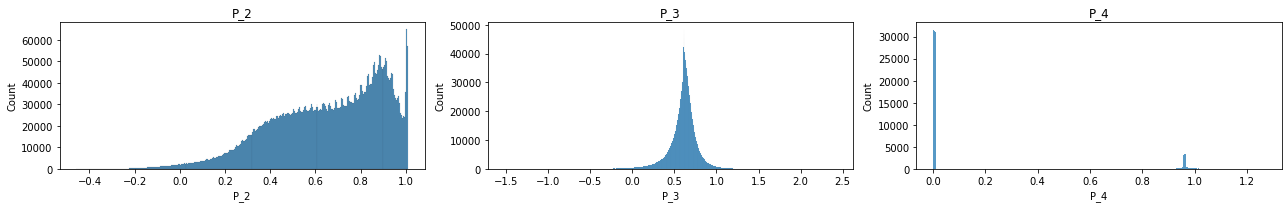

In [42]:
ncols = 3
feats = features

nrows = int(np.ceil(len(feats) / ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18, int(3 * nrows)))

for ax, f in zip(axes.ravel(), feats):
    sns.histplot(x=f, data=df, ax=ax)
    ax.set_title(f)
    
plt.tight_layout()
plt.show()